In [2]:
import numpy as np
import pandas as pd


In [19]:
unames=['user_id', 'gender','age','occupation','zip']
users=pd.read_table('users.dat',sep='::',header=None,names=unames,engine='python')
rnames=['user_id', 'movie_id','rating','timestamp']
ratings=pd.read_table('ratings.dat',sep='::',header=None,names=rnames,engine='python')
mnames=['movie_id','title','genres']
movies=pd.read_table('movies.dat',sep='::',header=None,names=mnames,engine='python')

In [23]:
type(ratings)

pandas.core.frame.DataFrame

In [24]:
users.shape

(6040, 5)

In [25]:
data=pd.merge(pd.merge(ratings,users),movies)

In [26]:
data.shape

(1000209, 10)

In [29]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [31]:
data.dtypes

user_id        int64
movie_id       int64
rating         int64
timestamp      int64
gender        object
age            int64
occupation     int64
zip           object
title         object
genres        object
dtype: object

In [32]:
data.drop(data.columns[[3,7]],axis=1,inplace=True)

In [33]:
data.shape

(1000209, 8)

In [34]:
occupations = pd.Series(["other","academic","artist","admin","uni student","customer service","health care","managerial","farmer","homemaker","student","lawyer","programmer","retired","sales","scientist","self employed","engineer","tradesman","unemployed","writer"], index=range(21))

In [35]:
occupations

0                other
1             academic
2               artist
3                admin
4          uni student
5     customer service
6          health care
7           managerial
8               farmer
9            homemaker
10             student
11              lawyer
12          programmer
13             retired
14               sales
15           scientist
16       self employed
17            engineer
18           tradesman
19          unemployed
20              writer
dtype: object

In [37]:
data.occupation=data.occupation.map(occupations)

In [42]:
sum(data.duplicated())

0

In [43]:
print(np.min(data.isnull()))
np.max(data.isnull())

user_id       False
movie_id      False
rating        False
gender        False
age           False
occupation    False
title         False
genres        False
dtype: bool


user_id       False
movie_id      False
rating        False
gender        False
age           False
occupation    False
title         False
genres        False
dtype: bool

In [44]:
mr=data.pivot_table('rating',index='title',columns='gender',aggfunc='median')
mr

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.0,3.0
'Night Mother (1986),3.0,3.0
'Til There Was You (1997),3.0,2.0
"'burbs, The (1989)",3.0,3.0
...And Justice for All (1979),4.0,4.0
1-900 (1994),2.0,3.0
10 Things I Hate About You (1999),4.0,3.0
101 Dalmatians (1961),4.0,4.0
101 Dalmatians (1996),3.0,3.0


In [46]:
ratings_by_title = data.groupby('title').size().order(ascending=False)
ratings_by_title = data.title.value_counts()
ratings_by_title[:10]

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [47]:
sum_tite=ratings_by_title.index[ratings_by_title>=200]

In [48]:
sum_tite

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Blame It on Rio (1984)', 'My Life in Pink (Ma vie en rose) (1997)',
       'Runaway Train (1985)', 'American Tail: Fievel Goes West, An (1991)',
       'End of the Affair, The (1999)', 'Bean (1997)',
       'Cutting Edge, The (1992)', 'Dancer in the Dark (2000)',
       'Black Cauldron, The (1985)',
       'Nightmare on Elm Street 5: The Dream Child, A (1989)'],
      dtype='object', length=1426)

In [53]:
mr=mr.ix[sum_tite]
mr

gender,F,M
American Beauty (1999),5.0,5.0
Star Wars: Episode IV - A New Hope (1977),5.0,5.0
Star Wars: Episode V - The Empire Strikes Back (1980),4.0,5.0
Star Wars: Episode VI - Return of the Jedi (1983),4.0,4.0
Jurassic Park (1993),4.0,4.0
Saving Private Ryan (1998),4.0,5.0
Terminator 2: Judgment Day (1991),4.0,4.0
"Matrix, The (1999)",4.0,5.0
Back to the Future (1985),4.0,4.0
"Silence of the Lambs, The (1991)",5.0,5.0


In [57]:
to_fe_ratings=mr.sort_values(by='F',ascending=False)

In [58]:
to_fe_ratings

gender,F,M
American Beauty (1999),5.0,5.0
"Killing Fields, The (1984)",5.0,4.0
Citizen Kane (1941),5.0,5.0
"Third Man, The (1949)",5.0,5.0
Strangers on a Train (1951),5.0,4.0
"Manchurian Candidate, The (1962)",5.0,4.0
Singin' in the Rain (1952),5.0,5.0
Life Is Beautiful (La Vita è bella) (1997),5.0,5.0
Gone with the Wind (1939),5.0,4.0
Young Frankenstein (1974),5.0,4.0


In [64]:
byrating=data.groupby(["rating","gender"])
byrating

In [65]:
counts=byrating['rating'].count()

In [66]:
counts

rating  gender
1       F          13347
        M          42827
2       F          24548
        M          83009
3       F          62966
        M         198231
4       F          87033
        M         261938
5       F          58546
        M         167764
Name: rating, dtype: int64

In [67]:
df

NameError: name 'df' is not defined

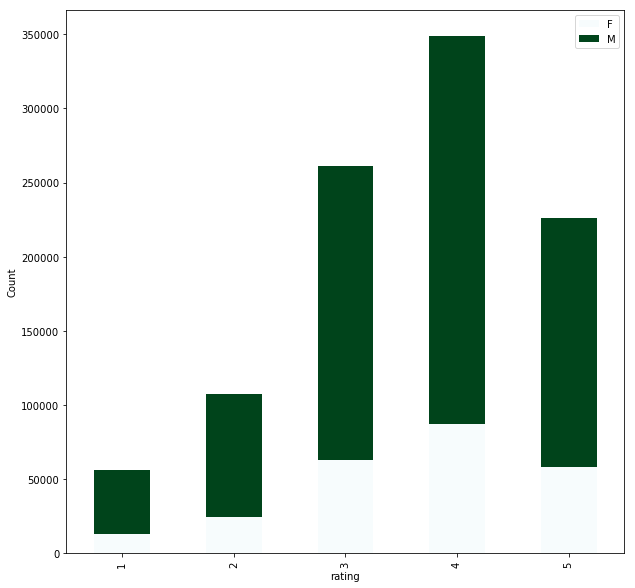

In [69]:
import matplotlib as plt
%matplotlib inline
df = counts.unstack()
ax = df.plot(kind='bar', stacked=True, figsize=(10, 10), colormap="BuGn")
ax.set_ylabel("Count")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

In [73]:
bygenre=data.groupby(['genres','gender'])

In [76]:
counts=bygenre['genres'].count()
counts

genres                                         gender
Action                                         F          1611
                                               M         10700
Action|Adventure                               F          1978
                                               M          8468
Action|Adventure|Animation                     F            64
                                               M           281
Action|Adventure|Animation|Children's|Fantasy  F            41
                                               M            94
Action|Adventure|Animation|Horror|Sci-Fi       F            71
                                               M           547
Action|Adventure|Children's                    F             4
                                               M            40
Action|Adventure|Children's|Comedy             F           123
                                               M           395
Action|Adventure|Children's|Fantasy            F             7
 

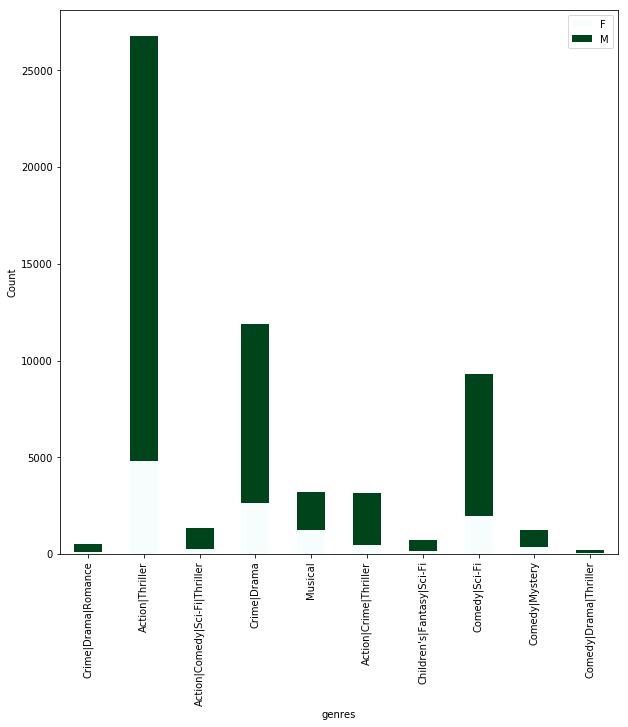

In [79]:
df = counts.unstack()
rows=np.random.choice(df.index.values,10)
df=df.ix[rows]
ax = df.plot(kind='bar', stacked=True, figsize=(10, 10), colormap="BuGn")
ax.set_ylabel("Count")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

In [80]:
byjob=data.groupby(['occupation','rating'])

In [81]:
counts=byjob['occupation'].count()
counts

occupation        rating
academic          1          4756
                  2          9054
                  3         22361
                  4         30577
                  5         18603
admin             1          1521
                  2          3083
                  3          7958
                  4         11236
                  5          7825
artist            1          3062
                  2          5486
                  3         12919
                  4         16899
                  5         11702
customer service  1          1070
                  2          2552
                  3          6446
                  4          7127
                  5          4655
engineer          1          3351
                  2          7193
                  3         19908
                  4         26155
                  5         16209
farmer            1           176
                  2           292
                  3           820
                  4    

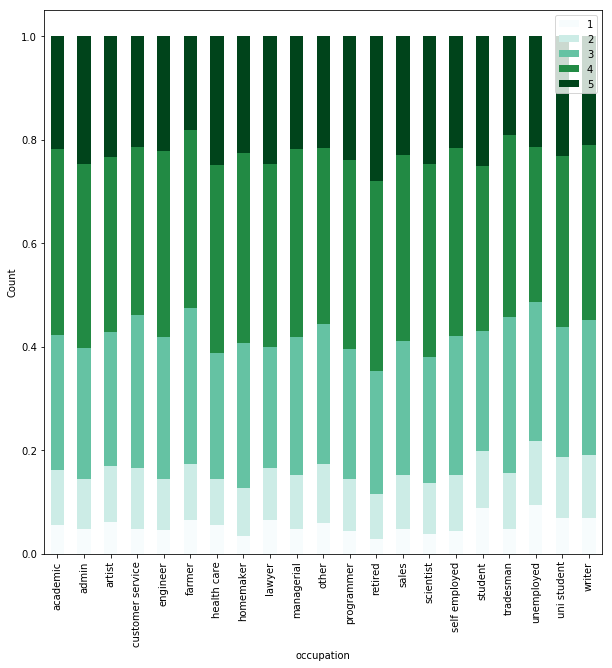

In [84]:
df = counts.unstack()
df=df.div(df.sum(1),axis=0)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 10), colormap="BuGn")
ax.set_ylabel("Count")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')